In [1]:
using DataFrames, CSV
using Query
using Wavelets
using LinearAlgebra
using Statistics
using Plots

In [2]:
float_pop = CSV.read("../data/float_pop_sorted.csv")

,cityname,2019-06-01 10:00:00,2019-06-01 11:00:00,2019-06-01 12:00:00,2019-06-01 13:00:00
,String,Float64,Float64,Float64,Float64
1,Chiyoda,1039.0,1113.0,1245.0,1183.0
2,Chuo,711.0,744.0,839.0,805.0
3,Minato,1031.0,1144.0,1258.0,1192.0
4,Bunkyo,365.0,398.0,459.0,493.0
5,Koutou,727.0,809.0,839.0,786.0
6,Shibuya,889.0,988.0,1166.0,1052.0
7,Shinagawa,613.0,724.0,701.0,625.0
8,Shinjuku,920.0,1022.0,1147.0,1146.0
9,Adachi,549.0,581.0,594.0,594.0


Refer to the python notebook for data preprocessing

In [3]:
float_pop_matrix = Matrix(float_pop)[:,2:513]

32×512 Array{Any,2}:
 1039.0  1113.0  1245.0  1183.0  1178.0  …  1029.0  1103.0  1123.0  1111.0
  711.0   744.0   839.0   805.0   770.0      706.0   678.0   739.0   750.0
 1031.0  1144.0  1258.0  1192.0  1193.0      974.0  1011.0  1038.0  1047.0
  365.0   398.0   459.0   493.0   427.0      373.0   385.0   400.0   444.0
  727.0   809.0   839.0   786.0   807.0      726.0   730.0   791.0   777.0
  889.0   988.0  1166.0  1052.0  1146.0  …  1034.0  1079.0  1131.0  1073.0
  613.0   724.0   701.0   625.0   682.0      606.0   672.0   688.0   740.0
  920.0  1022.0  1147.0  1146.0  1163.0     1023.0  1088.0  1119.0  1135.0
  549.0   581.0   594.0   594.0   592.0      513.0   554.0   576.0   565.0
  266.0   295.0   310.0   277.0   266.0      251.0   253.0   296.0   288.0
  505.0   573.0   667.0   656.0   632.0  …   635.0   659.0   651.0   661.0
  539.0   587.0   561.0   568.0   558.0      489.0   476.0   566.0   550.0
  452.0   444.0   466.0   498.0   475.0      426.0   424.0   452.0   453.0
    

32-element CSV.Column{String,String}:
 "Chiyoda"  
 "Chuo"     
 "Minato"   
 "Bunkyo"   
 "Koutou"   
 "Shibuya"  
 "Shinagawa"
 "Shinjuku" 
 "Adachi"   
 "Arakawa"  
 "Daito"    
 "Edogawa"  
 "Itabashi" 
 ⋮          
 "Setagaya" 
 "Suginami" 
 "Sumida"   
 "Toshima"  
 "Akishima" 
 "Chofu"    
 "Fuchu"    
 "Hachioji" 
 "Machida"  
 "Mitaka"   
 "Tachikawa"
 "Ome"      

In [6]:
include("../../../autocorrelation-shell/src/AutocorrelationShell.jl")

Main.AutocorrelationShell

In [7]:
using Main.AutocorrelationShell

In [8]:
H = wavelet(WT.db2)
L = 6
Q = qfilter(H)
P = pfilter(H)

7-element Array{Float64,1}:
 -0.044194173824159244 
 -5.887846720064156e-17
  0.397747564417433    
  0.7071067811865475   
  0.397747564417433    
 -5.887846720064156e-17
 -0.044194173824159244 

In [9]:
size(float_pop_matrix)

(32, 512)

In [11]:
decomp = ac2d(float_pop_matrix, 1, 1, P, Q)

32×512×9×5 Array{Float64,4}:
[:, :, 1, 1] =
 41877.9  41877.1  41876.5  41876.2  …  41883.7  41881.9  41880.3  41879.0
 43078.2  43077.4  43076.7  43076.4     43084.3  43082.4  43080.8  43079.4
 43939.7  43938.8  43938.1  43937.8     43945.9  43944.0  43942.3  43940.9
 44446.6  44445.7  44445.0  44444.7     44452.9  44451.0  44449.3  44447.8
 44718.8  44717.8  44717.1  44716.7     44725.1  44723.1  44721.4  44720.0
 44778.9  44778.0  44777.3  44776.9  …  44785.1  44783.2  44781.6  44780.1
 44555.0  44554.1  44553.4  44553.0     44561.1  44559.2  44557.6  44556.2
 44058.3  44057.3  44056.7  44056.2     44064.1  44062.3  44060.7  44059.4
 43266.4  43265.6  43264.9  43264.5     43271.9  43270.3  43268.8  43267.5
 42217.0  42216.2  42215.6  42215.2     42222.1  42220.6  42219.2  42218.0
 40984.2  40983.4  40982.9  40982.5  …  40988.8  40987.4  40986.2  40985.1
 39595.2  39594.5  39594.0  39593.6     39599.3  39598.1  39597.0  39596.0
 38099.8  38099.2  38098.7  38098.3     38103.4  38102.3

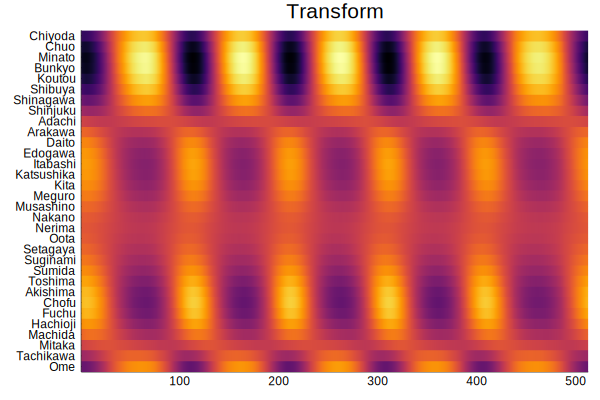

In [41]:
h2 = heatmap(decomp[:,:,4, 2], title="Transform", legend=false, yflip=true)
heatmap!(yticks = ([1:1:32;], float_pop[!, :cityname]))

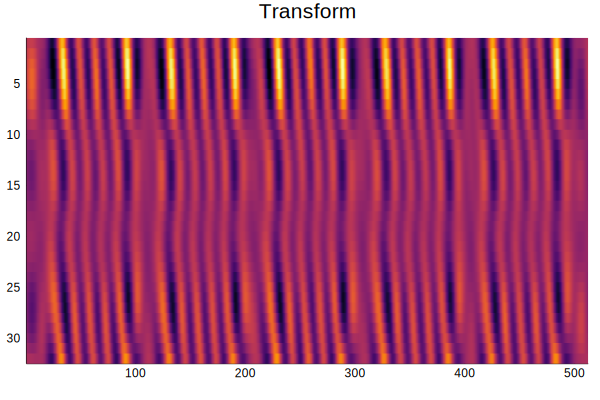

In [27]:
heatmap(decomp[:,:,6, 2], title="Transform", legend=false, yflip=true)

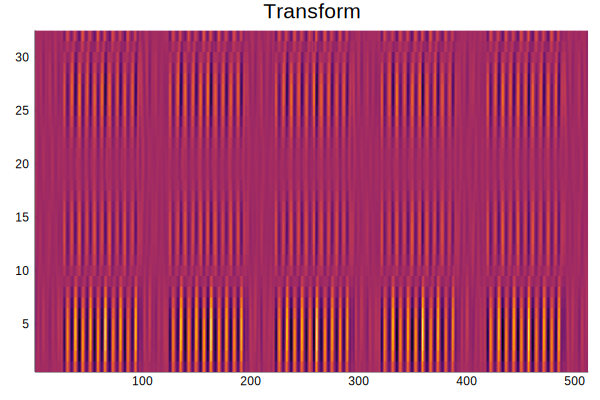

In [25]:
heatmap(decomp[:,:,8, 2], title="Transform", legend=false)

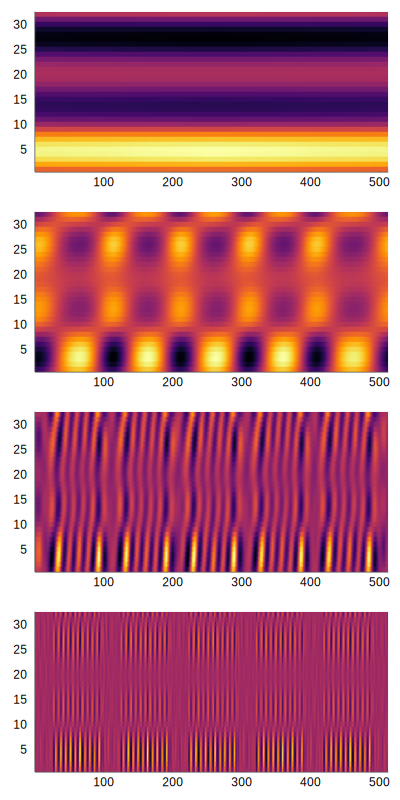

In [26]:
h1 = heatmap(decomp[:,:,1, 2], legend=false)
h2 = heatmap(decomp[:,:,4, 2], legend=false)
h3 = heatmap(decomp[:,:,6, 2], legend=false)
h4 = heatmap(decomp[:,:,8, 2], legend=false)
plot(h1, h2, h3, h4, layout = grid(4,1), size=(400, 800))

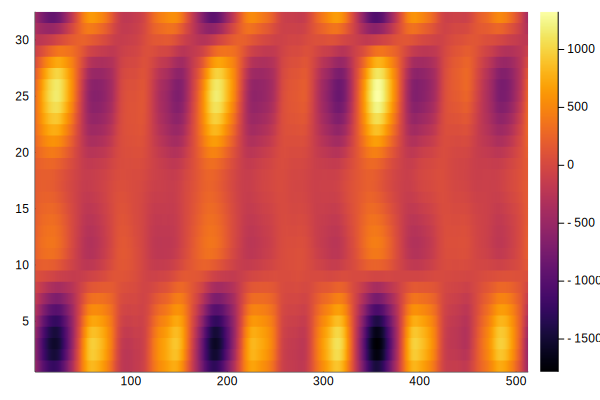

In [55]:
h5 = heatmap(decomp[:,:,4, 2])